11490434/11490434 [==============================] - 1s 0us/step


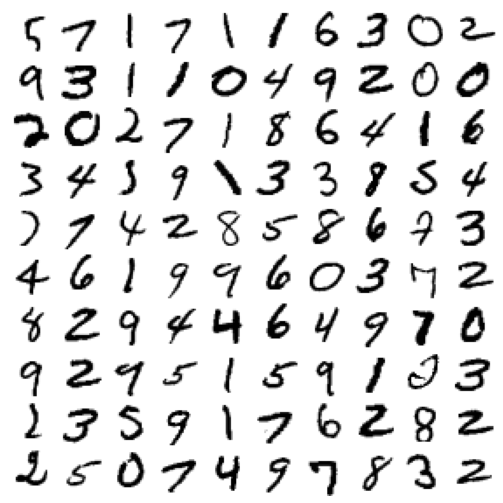

In [1]:
import numpy as np # Import numpy, pandas and matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
#%%
# Importing the dataset
from keras.datasets import mnist
from keras.utils import np_utils
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# The training data will have 60000 samples, reshape for necessary array dimensions
train_X = train_X.reshape(train_X.shape[0], 1, 28*28)
train_X = train_X.astype('float32')
train_X /= 255
# Create desired out or one-hot-array. Range [0, 9] with vector size 10
train_y = np_utils.to_categorical(train_y)
# Test data contains 10000 samples

test_X = test_X.reshape(test_X.shape[0], 1, 28*28)
test_X = test_X.astype('float32')
test_X /= 255
test_y = np_utils.to_categorical(test_y)
#%%
def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap = mpl.cm.binary, **options)
  plt.axis("off")
#%%
plt.figure(figsize=(9,9))
example_images = train_X[100:200]
plot_digits(example_images, images_per_row=10)
plt.show()

In [2]:
import keras
import tensorflow as tf
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [4]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 12)                9420      
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 9,660
Trainable params: 9,660
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

run_index = 1 # increment this at every run

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)


history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 2.1881 - accuracy: 0.2331 - val_loss: 2.0527 - val_accuracy: 0.2922
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.9227 - accuracy: 0.3202 - val_loss: 1.7847 - val_accuracy: 0.3924
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 1.6365 - accuracy: 0.4591 - val_loss: 1.4658 - val_accuracy: 0.5380
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3127 - accuracy: 0.5897 - val_loss: 1.1445 - val_accuracy: 0.6736
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.0267 - accuracy: 0.7122 - val_loss: 0.9030 - val_accuracy: 0.7612
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8345 - accuracy: 0.7635 - val_loss: 0.7562 - val_accuracy: 0.7930
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7206 - accuracy: 0.7896 - val_loss: 0.6679 - val_accuracy:

In [6]:
model.save('path/to/location/modelMLP')
!zip -r path/to/location/file.zip path/to/location/modelMLP

  adding: path/to/location/modelMLP/ (stored 0%)
  adding: path/to/location/modelMLP/keras_metadata.pb (deflated 88%)
  adding: path/to/location/modelMLP/fingerprint.pb (stored 0%)
  adding: path/to/location/modelMLP/saved_model.pb (deflated 87%)
  adding: path/to/location/modelMLP/variables/ (stored 0%)
  adding: path/to/location/modelMLP/variables/variables.index (deflated 54%)
  adding: path/to/location/modelMLP/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: path/to/location/modelMLP/assets/ (stored 0%)
